# Analyse the LEGO dataset

# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence.

# Import Statements

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
colors = pd.read_csv("/content/drive/MyDrive/Colab Notebooks (1)/LEGO Notebook and Data (start)/data/colors.csv")
sets = pd.read_csv("/content/drive/MyDrive/Colab Notebooks (1)/LEGO Notebook and Data (start)/data/sets.csv")
themes = pd.read_csv("/content/drive/MyDrive/Colab Notebooks (1)/LEGO Notebook and Data (start)/data/themes.csv")

In [3]:
print(colors.head())
print(colors.shape)

   id            name     rgb is_trans
0  -1         Unknown  0033B2        f
1   0           Black  05131D        f
2   1            Blue  0055BF        f
3   2           Green  237841        f
4   3  Dark Turquoise  008F9B        f
(135, 4)


In [4]:
print(sets.head())
print(sets.shape)

  set_num                        name  year  theme_id  num_parts
0   001-1                       Gears  1965         1         43
1  0011-2           Town Mini-Figures  1978        84         12
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          0
3  0012-1          Space Mini-Figures  1979       143         12
4  0013-1          Space Mini-Figures  1979       143         12
(15710, 5)


In [5]:
print(themes.head())
print(themes.shape)

   id            name  parent_id
0   1         Technic        NaN
1   2  Arctic Technic        1.0
2   3     Competition        1.0
3   4  Expert Builder        1.0
4   5           Model        1.0
(596, 3)


# Data Exploration

First, we will explore how many different colours does the LEGO company produce. We will Read the colors.csv file in the data folder and find the total number of unique colours.

In [6]:
colors["name"].nunique()

135

There are 135 uniques colors.

## Find the number of transparent colours

In [7]:
colors.groupby('is_trans').count() 

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


There are 28 transparent colours.

### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src= "https://i.imgur.com/aKcwkSx.png"/>

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src = "https://i.imgur.com/whB1olq.png"/> 

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

In [8]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [9]:
sets.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


Let's find in which year were the first LEGO sets released and what were these sets called?

In [10]:
min_year = sets["year"].min()

In [11]:
print(min_year)

1949


In [12]:
first_sets = sets[sets["year"] == min_year]

In [13]:
first_sets

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


The first LEGO sets was released in 1949, with the names of the sets they released listed above. They sold 5 sets in their first year.

Let's Find the top 5 LEGO sets with the most number of parts. 

In [14]:
sets.sort_values('num_parts', ascending = False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


The largest LEGO set ever produced has around 10,000 pieces! Apparently, only two of these boxes were ever produced, so if you wanted to get your hands on a ridiculously large LEGO set, you'll have to settle for the 7,541 piece Millennium Falcon.

## Sets Per Year

Next, we will use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [15]:
sets_by_year = sets.groupby("year").count()
sets_by_year["set_num"]

year
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, Length: 71, dtype: int64

Lego seems to release more sets the for every year after. 

In [16]:
sets_by_year["set_num"].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

In [17]:
sets_by_year["set_num"].tail()

year
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, dtype: int64

From this, we can see that LEGO published less than 10 different sets per year during its first few years of operation. But by 2019 the company had grown spectacularly, releasing 840 sets in that year alone!

## Visualize the Number of Sets Published over Time

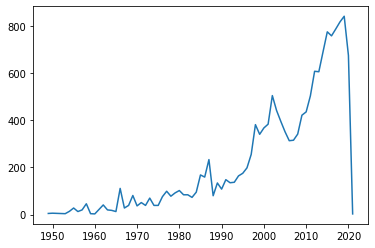

In [18]:
plt.plot(sets_by_year.index, sets_by_year.set_num)

<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, we will have to exclude some data from the chart.

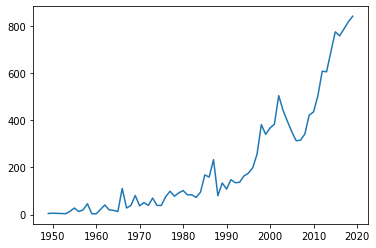

In [19]:
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])

We also see that while the first 45 years or so, LEGO had some steady growth in its product offering, but it was really in the mid-1990s that the number of sets produced by the company increased dramatically! We also see a brief decline in the early 2000s and a strong recovery around 2005 in the chart.

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [20]:
theme_by_year = sets.groupby("year").agg({"theme_id":pd.Series.nunique})
theme_by_year.rename(columns = {"theme_id" : "nr_themes"}, inplace = "True")
theme_by_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


Here we can see that LEGO only had 2 themes during the first few years, but just like the number of sets the number of themes expanded manifold over the years. Let's plot this on a chart again.

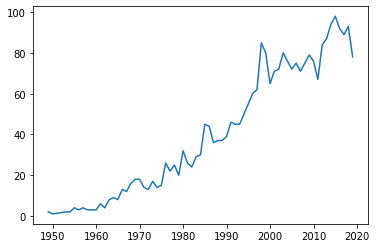

In [21]:
plt.plot(theme_by_year.index[:-2], theme_by_year.nr_themes[:-2])

Again, we can see that LEGO has pretty consistently added more and more themes until the mid-1990s. From then the number of themes has stagnated for around 10 years or so until the early 2010s.

### Line Charts with Two Seperate Axes

Text(0, 0.5, 'Number of Themes')

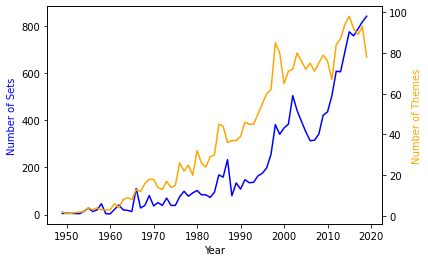

In [22]:
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() #create another axis that shares the same x-axis
#plot
ax1.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2], color = "blue")
ax2.plot(theme_by_year.index[:-2], theme_by_year.nr_themes[:-2], color = "orange")
#add styling
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Sets", color = "blue")
ax2.set_ylabel("Number of Themes", color = "orange")

Next, let's figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [23]:
parts_per_set = sets.groupby("year").agg({"num_parts": pd.Series.mean})
parts_per_set.rename(columns = {"num_parts" : "avg_num_parts"}, inplace = "True")
parts_per_set

,avg_num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143
...,...
2017,221.840967
2018,213.618873
2019,207.510714


### Scatter Plots in Matplotlib

Has the size and complexity of LEGO sets increased over time based on the number of parts? Next, we will plot the average number of parts over time using a Matplotlib scatter plot.  

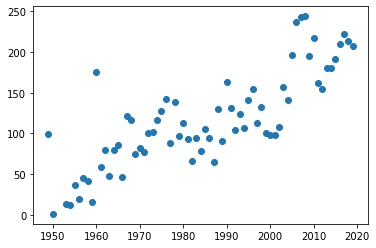

In [24]:
plt.scatter(parts_per_set[:-2].index, parts_per_set[:-2]["avg_num_parts"])

From the chart, we can see an upward trend in the size and complexity of the LEGO sets based on the average number of parts. In the 2010s the average set contained around 200 individual pieces, which is roughly double what average LEGO set used to contain in the 1960s.

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [25]:
set_theme_count = sets["theme_id"].value_counts()
set_theme_count

158    753
501    656
494    398
435    356
503    329
      ... 
307      1
215      1
361      1
210      1
414      1
Name: theme_id, Length: 571, dtype: int64

In [26]:
set_theme_count = pd.DataFrame({"id":set_theme_count.index, 
                                "set_count":set_theme_count.values})
set_theme_count

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329
...,...,...
566,307,1
567,215,1
568,361,1
569,210,1


Hmm not very informative, we don't know what are those nunmbers actually represented. So it's time for use to combine dataframe toghether.

This is the database schema
<img src = "https://i.imgur.com/Sg4lcjx.png" />

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

We will explore the themes.csv. How is it structured?. and see how many <code>id</code>s correspond to this name in the themes.csv? 

In [27]:
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


There aree only 3 columns in the `themes.csv`. that are, `id` of the theme, `name` of the theme, and the `parent_id` of the theme.

In [28]:
themes[themes["name"] == "Star Wars"]

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


Not every name is unique! Theree are 4 ids that correspond to the 'Star Wars' name in the `themes.csv`

### Merging Themes and Sets

Wouldn't it be nice if we could combine our data on theme names with the number sets per theme?

In [30]:
merged_df = pd.merge(set_theme_count, themes, on = "id")
merged_df

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0
...,...,...,...,...
566,307,1,Aquazone,NaN
567,215,1,Pirates,207.0
568,361,1,Skull Spiders,324.0
569,210,1,Belville,207.0


Yayy, let's draw the bar chart now!

<BarContainer object of 10 artists>

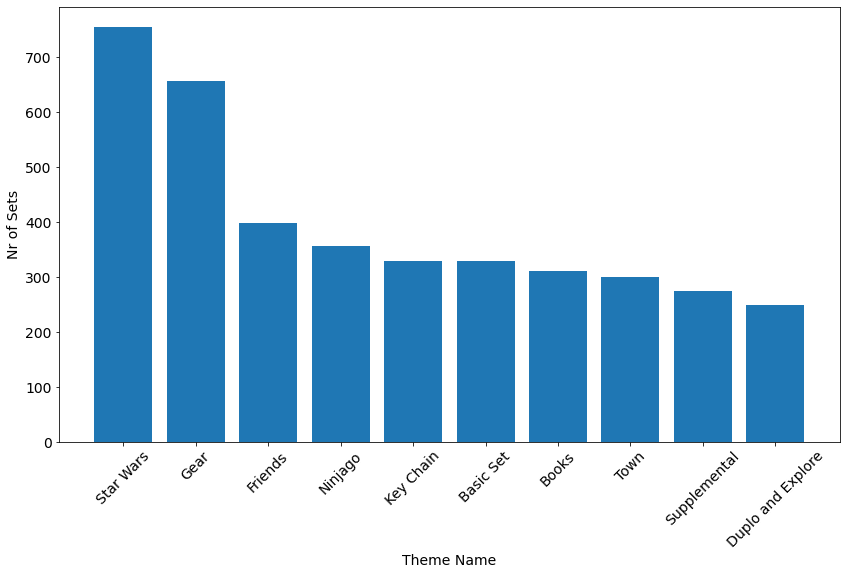

In [31]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)
 
plt.bar(merged_df.name[:10], merged_df.set_count[:10])

So what can we see here? Well, a couple of these themes like Star Wars, Town, or Ninjago are what I would think of when I think of LEGO. However, it looks like LEGO also produces a huge number of ... books and key chains?!?! it's interesting that the LEGO company seems to produce so much more these days than just plastic bricks.